In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/kaggle/input/unshape-dataset-unshap-csv/ushape.csv")

In [5]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values


In [7]:
y

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.])

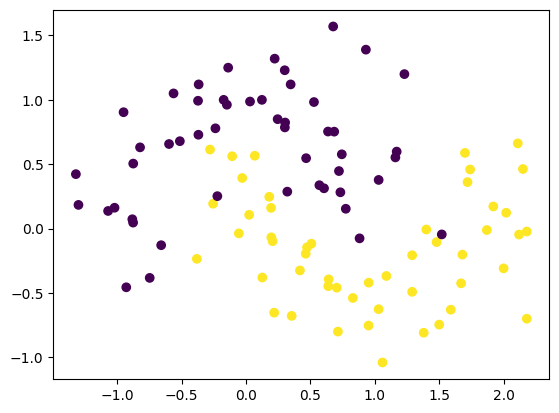

In [8]:
plt.scatter(x[:,0],x[:,1],c=y)

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [10]:
clf.fit(x,y)

LogisticRegression()

<Axes: >

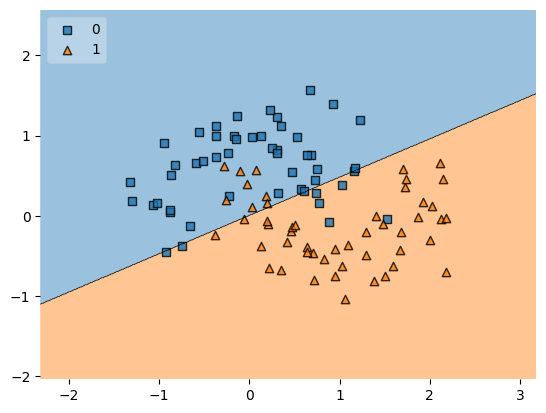

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf,legend=2)

In [15]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))

0.8300000000000001

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
x_trf = poly.fit_transform(x)

In [18]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,x_trf,y,scoring='accuracy',cv=10))

0.9

In [25]:
def plot_decision_boundary(x,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    x_trf = poly.fit_transform(x)
    
    clf = LogisticRegression()
    clf.fit(x_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=x[:,0].min()-1, stop=x[:,0].max()+1, step=0.01)
    b=np.arange(start=x[:,1].min()-1, stop=x[:,1].max()+1, step=0.01)


    xx,yy=np.meshgrid(a,b)
    
    input_array=np.array([xx.ravel(),yy.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.5)
    plt.scatter(x[:,0],x[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

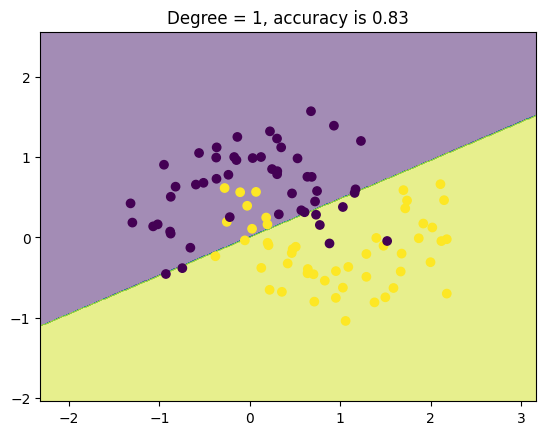

In [28]:
plot_decision_boundary(x,y)

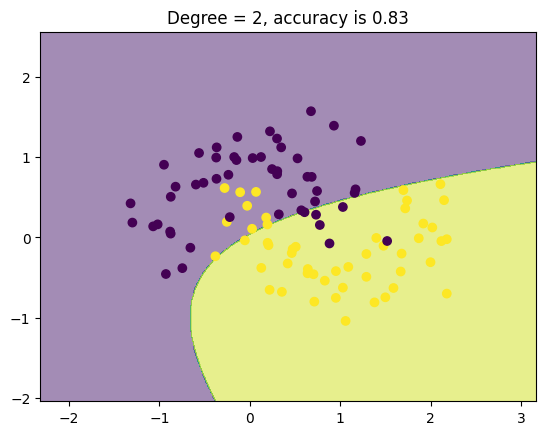

In [27]:

plot_decision_boundary(x,y,degree=2)

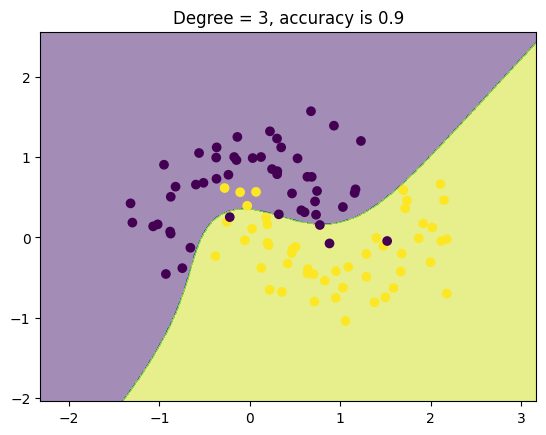

In [29]:
plot_decision_boundary(x,y,degree=3)

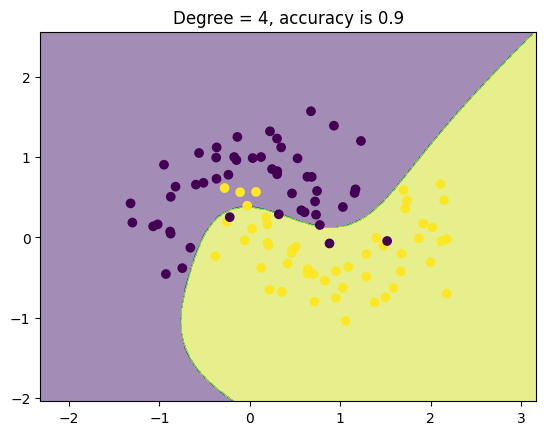

In [30]:
plot_decision_boundary(x,y,degree=4)

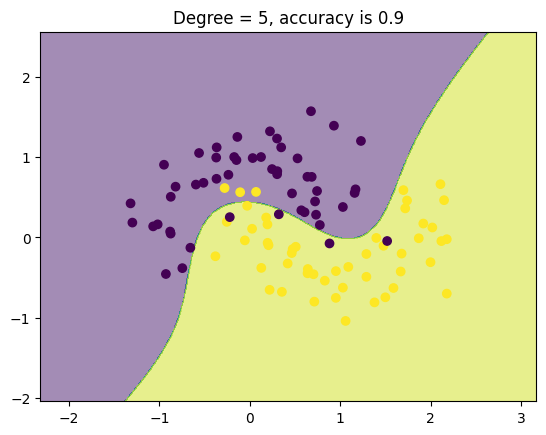

In [31]:
plot_decision_boundary(x,y,degree=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

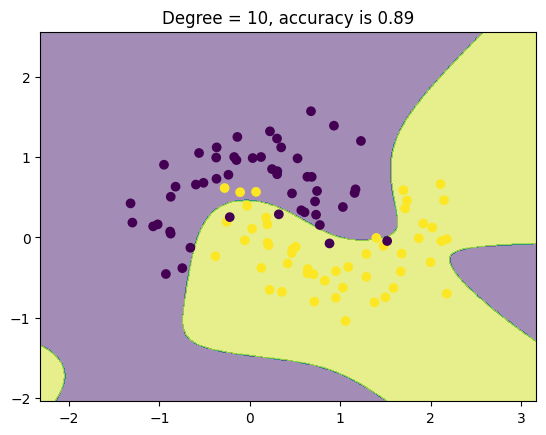

In [32]:
plot_decision_boundary(x,y,degree=10)